# Fair Prediction
### Project By- Pruthviraj Shinde
### Email id- me21m086@smail.iitm.ac.in

## Importing Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as num
import seaborn as sns

## Reading the Data

In [136]:
data=pd.read_csv("https://raw.githubusercontent.com/premalatha-success/Datasets/main/TaxiFare.csv")

In [137]:
data.head()


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [138]:
data.shape


(50000, 8)

In [139]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [140]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


## Exploratory Data Analysis

In [141]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [142]:
data.drop(data[data['longitude_of_pickup'] == 0].index, axis=0, inplace = True)
data.drop(data[data['latitude_of_pickup'] == 0].index, axis=0, inplace = True)
data.drop(data[data['longitude_of_dropoff'] == 0].index, axis=0, inplace = True)
data.drop(data[data['latitude_of_dropoff'] == 0].index, axis=0, inplace = True)

data.drop(data[data['no_of_passenger'] > 5].index, axis=0, inplace = True)
data.drop(data[data['no_of_passenger'] == 0].index, axis=0, inplace = True)

data.shape

(47863, 8)

In [143]:
data.dropna(inplace=True)

data.drop(data.index[(data.longitude_of_pickup < -75) | 
           (data.longitude_of_pickup > -72) | 
           (data.latitude_of_pickup < 40) | 
           (data.latitude_of_pickup > 42)],inplace=True)
data.drop(data.index[(data.longitude_of_dropoff < -75) | 
           (data.longitude_of_dropoff> -72) | 
           (data.latitude_of_dropoff < 40) | 
           (data.latitude_of_dropoff > 42)],inplace=True)
data.shape

(47818, 8)

In [144]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])

data.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [77]:
print(f"There are {len(data[data['amount'] < 0])} negative fares.")
print(f"There are {len(data[data['amount'] == 0])} $0 fares.")
print(f"There are {len(data[data['amount'] > 100])} fares greater than $100.")

There are 5 negative fares.
There are 3 $0 fares.
There are 15 fares greater than $100.


In [145]:
data = data[data['amount'].between(left = 2.5, right = 100)]
data.shape
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


## Visualising 

C:\Users\prasanth.inavolu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


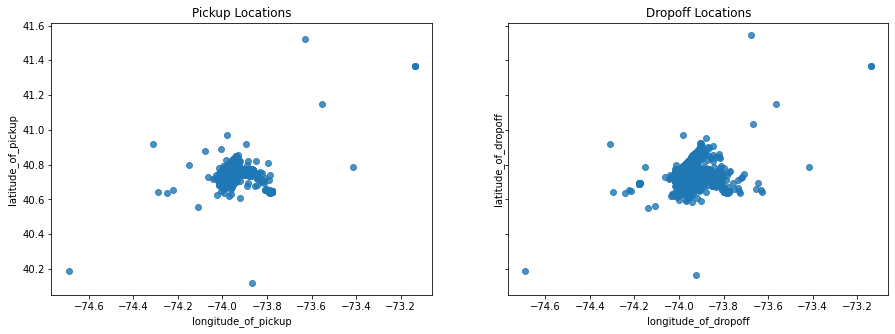

In [146]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot('longitude_of_pickup', 'latitude_of_pickup', fit_reg = False, 
            data = data.sample(10000, random_state = 123), ax = axes[0]);
sns.regplot('longitude_of_dropoff', 'latitude_of_dropoff', fit_reg = False, 
            data = data.sample(10000, random_state = 123), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');


Text(0.5, 1.0, 'Absolute latitude difference vs Absolute longitude difference')

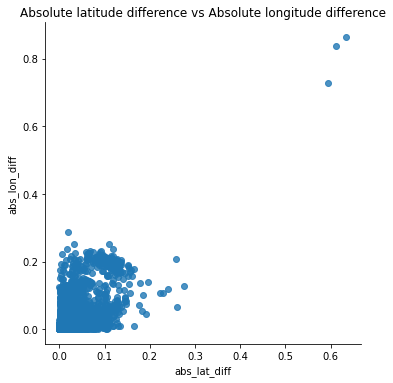

In [147]:
# Absolute difference in latitude and longitude
data['abs_lat_diff'] = (data['latitude_of_dropoff'] - data['latitude_of_pickup']).abs()
data['abs_lon_diff'] = (data['longitude_of_dropoff'] - data['longitude_of_pickup']).abs()
sns.lmplot('abs_lat_diff', 'abs_lon_diff', fit_reg = False,
           data = data.sample(10000, random_state=123));
plt.title('Absolute latitude difference vs Absolute longitude difference')

## Checking the DataSet

In [148]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,abs_lat_diff,abs_lon_diff
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


## Analysing the data

In [86]:
from math import radians, cos,sin, asin,sqrt

In [149]:


def distance(lat_diff, lon_diff, lon_pick, lon_drop):

    lat1 =radians(lon_pick)
    lat2 =radians(lon_drop)
    
    dlon =radians(lon_diff)
    dlat =radians(lat_diff)
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
data['dist_km'] =data.apply(lambda x: distance(x.abs_lat_diff, x.abs_lon_diff ,x.longitude_of_pickup ,x.longitude_of_dropoff), axis=1)


In [164]:
data_frame=data.copy()
data_frame

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,abs_lat_diff,abs_lon_diff,dist_km
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701,1.01
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780,7.94
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504,1.22
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437,2.78
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440,1.79
...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,0.042538,0.016926,4.76
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.007614,0.002609,0.85
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,0.020055,0.004590,2.23
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.002120,0.007388,0.33


In [165]:
data_frame.drop(["abs_lat_diff","abs_lat_diff","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"] ,axis=1,inplace=True)


In [166]:
data_frame.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,abs_lon_diff,dist_km
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.002701,1.01
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,0.036780,7.94
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,0.008504,1.22
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.004437,2.78
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,0.011440,1.79


In [167]:
print("Date in data : ", data["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in data : ", data["date_time_of_pickup"].dt.month.unique()[0])
print("Year in data : ", data["date_time_of_pickup"].dt.year.unique()[0])

Date in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in data :  6
Year in data :  2009


In [168]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

data_frame["weekday_name"] = data["date_time_of_pickup"].dt.weekday.map(week_names)
data_frame.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,abs_lon_diff,dist_km,weekday_name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.002701,1.01,Sunday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,0.036780,7.94,Monday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,0.008504,1.22,Wednesday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.004437,2.78,Friday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,0.011440,1.79,Monday


In [169]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

data_frame["weekday_name"] = data_frame["weekday_name"].map(week_names_encode)
data_frame.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,abs_lon_diff,dist_km,weekday_name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.002701,1.01,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,0.036780,7.94,3
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,0.008504,1.22,6
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.004437,2.78,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,0.011440,1.79,3


In [170]:
data_frame["Hour"] = data_frame["date_time_of_pickup"].dt.hour
data_frame["Month_Day"] = data_frame["date_time_of_pickup"].dt.day
data_frame.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,abs_lon_diff,dist_km,weekday_name,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.002701,1.01,1,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,0.036780,7.94,3,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,0.008504,1.22,6,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.004437,2.78,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,0.011440,1.79,3,7,9


In [173]:
X=data_frame.drop(['amount','date_time_of_pickup','abs_lon_diff','unique_id'],axis=1)
y=data_frame['amount']

In [174]:
X.head()

,no_of_passenger,dist_km,weekday_name,Hour,Month_Day
0,1,1.01,1,17,15
1,1,7.94,3,16,5
2,2,1.22,6,0,18
3,1,2.78,5,4,21
4,1,1.79,3,7,9


In [175]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

# Model

## Defining independent and dependent variables

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

## Linear Regression

In [187]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept= True, normalize =True)
linreg.fit(X_train , y_train)

LinearRegression(normalize=True)

In [188]:
y_pred = linreg.predict(X_test)

### Calculating Accuracy

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.4837153866803626

## Decision Tree Regressor

In [190]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [191]:
pred = dt_reg.predict(X_test)
r2_score(y_test, pred)

0.14882940736770944